In [16]:
import matplotlib.pyplot as plt
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [13]:
def mostrar_comparacion_imagen(ruta_imagen, escala=1.0):
    # Leer la imagen con OpenCV
    imagen = cv2.imread(ruta_imagen, cv2.IMREAD_COLOR)
    if imagen is None:
        raise FileNotFoundError(f"No se pudo encontrar la imagen en la ruta: {ruta_imagen}")
    
    # Convertir de BGR a RGB para su correcta visualización con matplotlib
    imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

    # Redimensionar la imagen según la escala proporcionada
    nueva_dim = (int(imagen_rgb.shape[1] * escala), int(imagen_rgb.shape[0] * escala))
    imagen_escalada = cv2.resize(imagen_rgb, nueva_dim)

    # Crear figura con dos subgráficos
    plt.figure(figsize=(12, 6))

    # Imagen original
    plt.subplot(1, 2, 1)
    plt.imshow(imagen_rgb)
    plt.title(f"Imagen Original{imagen.shape}")
    plt.axis('off')

    # Imagen escalada
    plt.subplot(1, 2, 2)
    plt.imshow(imagen_escalada)
    plt.title(f"Imagen Escalada x{escala}: {imagen_escalada.shape}")
    plt.axis('off')

    plt.show()

In [17]:
def mostrar_comparacion_knn(ruta_imagen, num_colores=8):
    """
    Lee una imagen desde una ruta y muestra la comparación entre la imagen original y la simplificada usando KNN.

    Parámetros:
    ruta_imagen (str): Ruta del archivo de imagen.
    num_colores (int): Número de colores para la simplificación de la imagen. Default es 8.

    Retorna:
    None
    """
    # Leer la imagen con OpenCV
    imagen = cv2.imread(ruta_imagen, cv2.IMREAD_COLOR)
    if imagen is None:
        raise FileNotFoundError(f"No se pudo encontrar la imagen en la ruta: {ruta_imagen}")
    
    # Convertir de BGR a RGB para su correcta visualización con matplotlib
    imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

    # Redimensionar a un array 2D de píxeles
    pixeles = imagen_rgb.reshape(-1, 3)

    # Aplicar KMeans para encontrar los clusters de colores
    kmeans = KMeans(n_clusters=num_colores, random_state=0)
    kmeans.fit(pixeles)

    # Reemplazar los colores por los colores más cercanos (clusters)
    colores_reducidos = kmeans.cluster_centers_.astype('uint8')
    etiquetas = kmeans.labels_
    imagen_simplificada = colores_reducidos[etiquetas].reshape(imagen_rgb.shape)

    # Crear figura con dos subgráficos
    plt.figure(figsize=(12, 6))

    # Imagen original
    plt.subplot(1, 2, 1)
    plt.imshow(imagen_rgb)
    plt.title("Imagen Original")
    plt.axis('off')

    # Imagen simplificada
    plt.subplot(1, 2, 2)
    plt.imshow(imagen_simplificada)
    plt.title(f"Imagen Simplificada ({num_colores} Colores)")
    plt.axis('off')

    plt.show()

In [30]:
def mostrar_comparacion_mean_shift(ruta_imagen, sp=30, sr=60):
    """
    Lee una imagen desde una ruta y muestra la comparación entre la imagen original y la segmentada usando Mean Shift.

    Parámetros:
    ruta_imagen (str): Ruta del archivo de imagen.
    sp (int): Parámetro de radio espacial (afecta la suavidad de los bordes). Default es 30.
    sr (int): Parámetro de rango de color (afecta la agrupación de colores). Default es 60.

    Retorna:
    None
    """
    # Leer la imagen con OpenCV
    imagen = cv2.imread(ruta_imagen, cv2.IMREAD_COLOR)
    if imagen is None:
        raise FileNotFoundError(f"No se pudo encontrar la imagen en la ruta: {ruta_imagen}")

    # Convertir de BGR a RGB para su correcta visualización con matplotlib
    imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

    # Aplicar el filtro Mean Shift
    imagen_segmentada = cv2.pyrMeanShiftFiltering(imagen, sp, sr)

    # Convertir la imagen procesada de BGR a RGB
    imagen_segmentada_rgb = cv2.cvtColor(imagen_segmentada, cv2.COLOR_BGR2RGB)

    # Crear figura con dos subgráficos
    plt.figure(figsize=(12, 6))

    # Imagen original
    plt.subplot(1, 2, 1)
    plt.imshow(imagen_rgb)
    plt.title("Imagen Original")
    plt.axis('off')

    # Imagen segmentada
    plt.subplot(1, 2, 2)
    plt.imshow(imagen_segmentada_rgb)
    plt.title(f"Imagen Segmentada (sp={sp}, sr={sr})")
    plt.axis('off')

    plt.show()

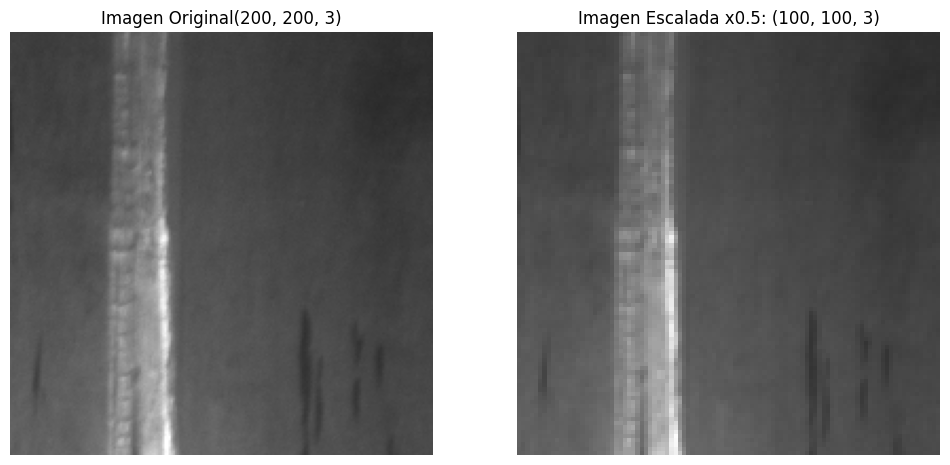

In [42]:
mostrar_comparacion_imagen("metal_dataset/test/Scratches/Sc_108.bmp", escala=0.5)

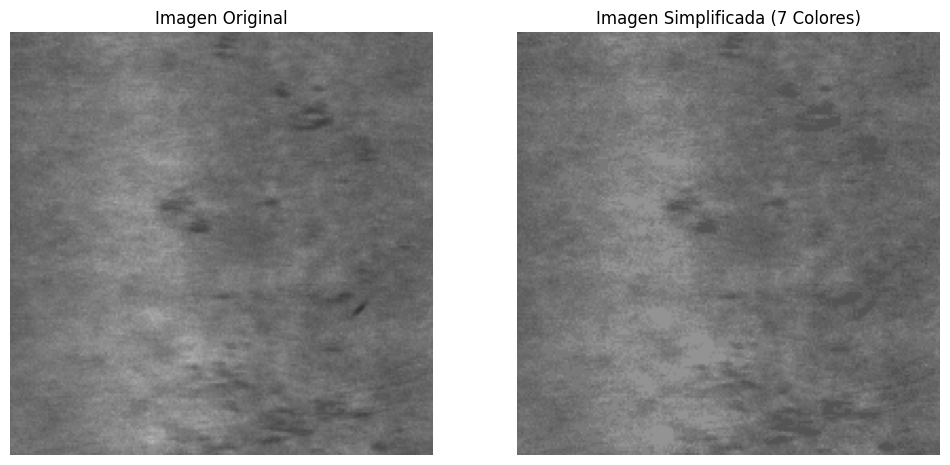

In [36]:
mostrar_comparacion_knn("metal_dataset/test/Rolled/RS_102.bmp", num_colores=7)

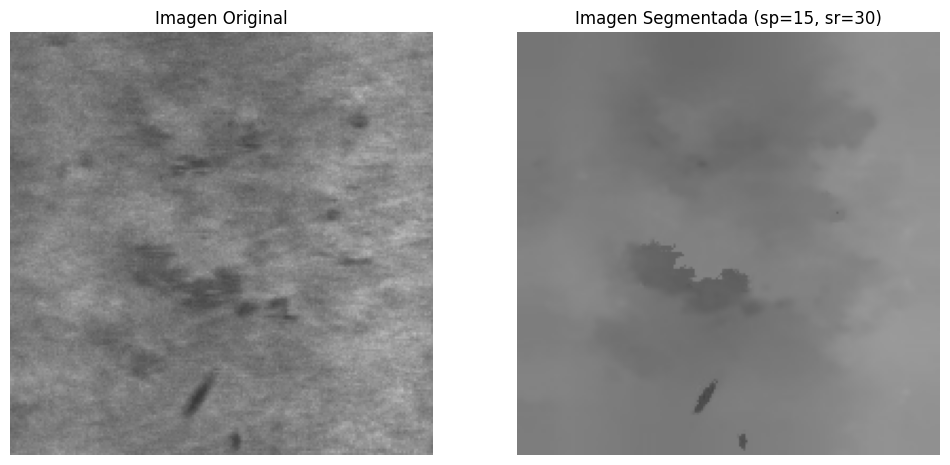

In [34]:
mostrar_comparacion_mean_shift("metal_dataset/test/Rolled/RS_10.bmp", sp=15, sr=30)